# Reflect daily stats

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from reflect.stats import SOLVE_DURATION_DIFFICULTY_BINS, load_firebase_events, compute_per_device_stats, compute_stats, load_features, merge_stats_and_features

## Playing stats

In [2]:
events_df = load_firebase_events()
device_df = compute_per_device_stats(events_df)
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
...,...,...,...,...,...,...,...,...,...
202,2023-11-03,20,20,17,85.000000,15.000000,62.1615,easy,2023-11-03
203,2023-11-04,22,20,16,80.000000,20.000000,138.5005,medium,2023-11-04
204,2023-11-05,26,26,17,65.384615,34.615385,329.7980,hard,2023-11-05
205,2023-11-06,28,27,19,70.370370,29.629630,147.0840,medium,2023-11-06


How many people are playing Reflect?

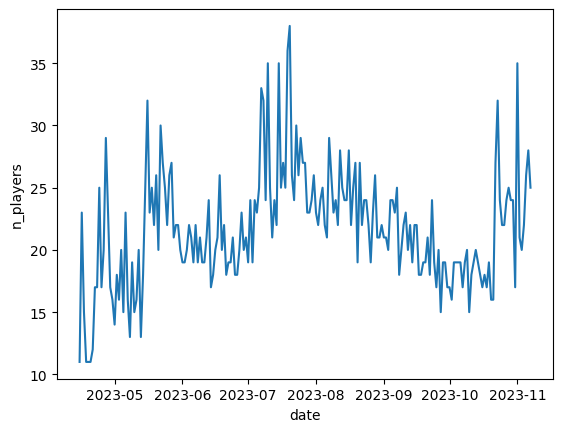

In [3]:
g = sns.lineplot(data=stats_df, x="date", y="n_players")

Total number of players ever (using devices as a proxy - of course the same person may have played on multiple devices)

In [4]:
len(events_df[events_df["name"] == "firstMove"]["device"].unique())

460

## Features

In [5]:
features_df = load_features()
all_df = merge_stats_and_features(stats_df, features_df)
all_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date,filename,...,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,num_zero_reflection_blocks,excess_reflections,num_excess_reflection_beams,num_beam_edges,difficulty,setter_solve_duration_s
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15,puzzle-2023-04-15.txt,...,4.666667,10,28,6,0,2,1,10,4,NaN
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16,puzzle-2023-04-16.txt,...,4.833333,9,29,4,0,2,1,11,4,NaN
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17,puzzle-2023-04-17.txt,...,6.000000,8,30,4,0,6,2,10,4,NaN
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18,puzzle-2023-04-18.txt,...,4.000000,7,28,0,0,1,1,10,4,NaN
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19,puzzle-2023-04-19.txt,...,4.666667,8,28,0,0,1,1,9,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2023-11-03,20,20,17,85.000000,15.000000,62.1615,easy,2023-11-03,puzzle-2023-11-03.txt,...,4.333333,8,26,2,0,2,1,9,4,31.6
203,2023-11-04,22,20,16,80.000000,20.000000,138.5005,medium,2023-11-04,puzzle-2023-11-04.txt,...,4.166667,7,25,0,0,4,2,10,4,44.7
204,2023-11-05,26,26,17,65.384615,34.615385,329.7980,hard,2023-11-05,puzzle-2023-11-05.txt,...,6.500000,7,26,6,0,2,1,8,4,166.6
205,2023-11-06,28,27,19,70.370370,29.629630,147.0840,medium,2023-11-06,puzzle-2023-11-06.txt,...,4.000000,8,28,0,0,2,1,10,4,57.6


## Puzzle difficulty

First let's look at median solve durations (compare to the setter duration indicated by +).

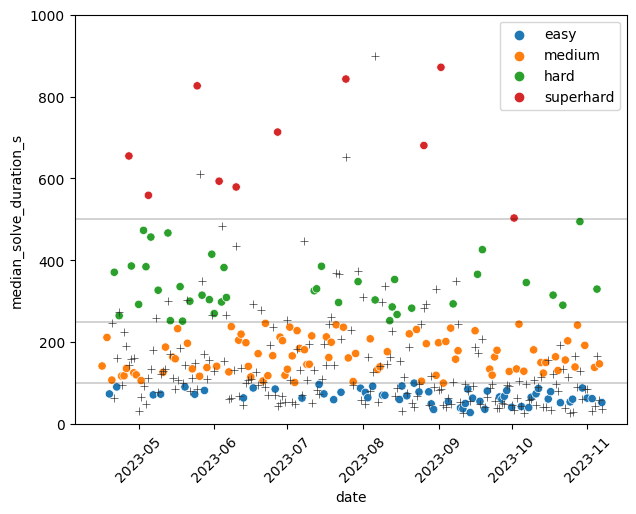

In [6]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');

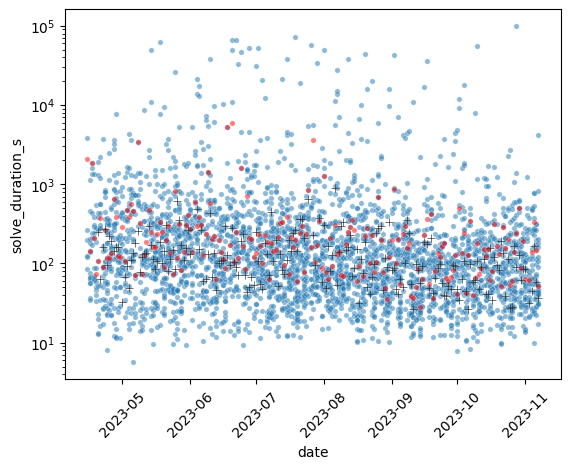

In [7]:
plt.xticks(rotation=45)
g = sns.scatterplot(data=device_df, x="date", y="solve_duration_s", s=15, alpha=0.5)
sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", s=15, alpha=0.5, color="red")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.set(yscale='log');

<Axes: xlabel='date', ylabel='failure_rate'>

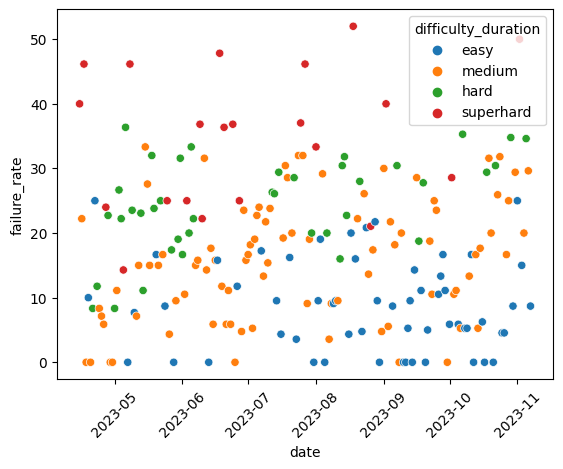

In [8]:
plt.xticks(rotation=45)
sns.scatterplot(data=stats_df, x="date", y="failure_rate", hue="difficulty_duration")

## Feature analysis

Let's see how features correlate with difficulty (as measured by `mean_solve_duration`)

In [9]:
all_df.columns

Index(['puzzle', 'n_players', 'n_started', 'n_solved', 'success_rate',
       'failure_rate', 'median_solve_duration_s', 'difficulty_duration',
       'date', 'filename', 'num_blocks', 'num_mirror_balls', 'num_beams',
       'num_reflections', 'mean_blocks_per_beam', 'max_blocks_per_beam',
       'num_multi_block_beams', 'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance',
       'num_zero_reflection_blocks', 'excess_reflections',
       'num_excess_reflection_beams', 'num_beam_edges', 'difficulty',
       'setter_solve_duration_s'],
      dtype='object')

In [10]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams', 'num_reflections',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'num_multi_block_beams',
       'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance', 'excess_reflections',
       'num_excess_reflection_beams']

In [11]:
all_df[["median_solve_duration_s", "failure_rate"] + feature_names].corr(numeric_only=True)\
    .sort_values("median_solve_duration_s", ascending=False)

,median_solve_duration_s,failure_rate,num_blocks,num_mirror_balls,num_beams,num_reflections,mean_blocks_per_beam,max_blocks_per_beam,num_multi_block_beams,mean_beams_per_block,max_beams_per_block,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,excess_reflections,num_excess_reflection_beams
median_solve_duration_s,1.000000,0.518178,0.073846,0.054013,0.125153,0.073386,-0.024938,0.113104,0.020982,0.092303,0.095609,0.085757,-0.034134,0.093075,0.200076,0.165127,0.185820,0.153560
failure_rate,0.518178,1.000000,0.142646,0.088224,0.111866,0.076078,0.036310,0.175773,0.051674,0.081093,0.114448,0.067344,-0.084542,0.152558,0.098886,0.263217,0.200669,0.154144
total_beam_distance,0.200076,0.098886,0.136813,0.105494,0.452357,0.300901,-0.236818,0.129324,0.049354,0.288405,-0.040257,0.396396,0.112724,0.334323,1.000000,0.292541,0.110407,0.020539
excess_reflections,0.185820,0.200669,0.330379,-0.410613,-0.282482,0.584425,0.485200,0.522469,-0.128312,-0.129742,-0.265705,0.358330,0.333387,0.173765,0.110407,0.134809,1.000000,0.782852
excess_beam_distance,0.165127,0.263217,-0.156057,-0.294433,-0.166290,0.262038,0.093338,0.252084,-0.131545,-0.021969,-0.271629,0.283124,0.351124,0.695310,0.292541,1.000000,0.134809,0.025792
num_excess_reflection_beams,0.153560,0.154144,0.271545,-0.199310,-0.169692,0.407003,0.436671,0.178774,0.055094,0.027472,0.001030,0.259452,0.139677,-0.009850,0.020539,0.025792,0.782852,1.000000
num_beams,0.125153,0.111866,-0.018820,0.813176,1.000000,-0.215095,-0.591231,-0.162367,0.175558,0.784105,0.619065,0.189748,-0.809119,-0.192318,0.452357,-0.166290,-0.282482,-0.169692
max_blocks_per_beam,0.113104,0.175773,0.153185,-0.318608,-0.162367,0.463697,0.343182,1.000000,-0.252165,0.010869,-0.152658,0.339210,0.220294,0.306883,0.129324,0.252084,0.522469,0.178774
max_beams_per_block,0.095609,0.114448,-0.052674,0.586295,0.619065,-0.356497,-0.253992,-0.152658,0.275493,0.641967,1.000000,-0.282731,-0.710355,-0.343361,-0.040257,-0.271629,-0.265705,0.001030
max_beam_distance,0.093075,0.152558,-0.100132,-0.267698,-0.192318,0.173026,-0.003059,0.306883,-0.250343,-0.168854,-0.343361,0.173530,0.399466,1.000000,0.334323,0.695310,0.173765,-0.009850


## Predictions over time

Train a model on data up to, but not including, date D, then use it to predict the solve duration on date D.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
np.random.seed(42)

In [14]:
model_df = all_df[all_df["median_solve_duration_s"] < 1000] # remove outliers for model

In [15]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams',
        'num_reflections',
        'max_blocks_per_beam',
       'num_double_reflect_blocks', 'excess_reflections']

In [16]:
response_variable = "median_solve_duration_s"

In [17]:
predict_df = model_df.copy()
predict_df["predicted_solve_duration_s"] = np.nan

puzzles = model_df[model_df["puzzle"] >= "2023-05-01"]["puzzle"].tolist()

for puzzle in puzzles:
    train_df = model_df[model_df["puzzle"] < puzzle]
    X_train = train_df[feature_names]
    y_train = train_df[[response_variable]].values.ravel()

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predicted_solve_duration_s = model.predict(model_df[model_df["puzzle"] == puzzle][feature_names])[0]

    predict_df.loc[predict_df['puzzle']==puzzle, ['predicted_solve_duration_s']] = predicted_solve_duration_s

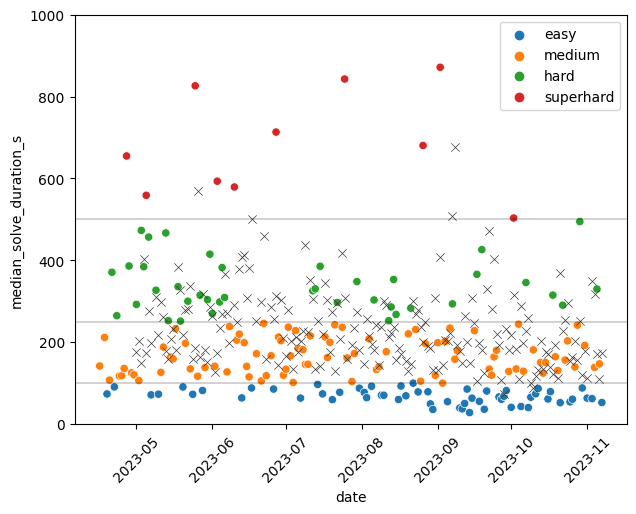

In [18]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=predict_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
# sns.scatterplot(data=predict_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
sns.scatterplot(data=predict_df, x="date", y="predicted_solve_duration_s", color=".2", marker="x")

g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');